# Rotten tomatoes

#### Loading 2 datasets (films general information and reviews)

In [153]:
import pandas as pd # importing pandas
o_rotten_1_df   = pd.read_csv("/home/ines/git/project-films/data/movie_info.tsv", sep='\t') # loading dataset 1
o_rotten_2_df   = pd.read_csv("/home/ines/git/project-films/data/reviews.tsv", sep='\t', encoding='latin1') # loading dataset 2

### Datasets content

#### Data preview

In [137]:
o_rotten_1_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [138]:
o_rotten_2_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [151]:
pd.DataFrame(o_rotten_1_df['rating'].value_counts())

,rating
R,521
NR,503
PG,240
PG-13,235
G,57
NC17,1


In [154]:
pd.DataFrame(o_rotten_2_df['rating'].value_counts())

,rating
3/5,4327
4/5,3672
3/4,3577
2/5,3160
2/4,2712
...,...
2.6/5,1
7.3/10,1
7.3,1
4.0/10,1


### Observations:
####  . Dataset 1 'rating' is reflects the age suitabibility, while dataset 2 'rating' reflects how much the critic rated the film. 
#### > Lets change the name of this columns in dataset 2 from 'rating' to 'score' to avoid confusion.

In [156]:
o_rotten_2_df.rename(columns={'rating':'score'}, inplace=True)
o_rotten_2_df.head()

,id,review,score,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


#### Features unique values

In [157]:
df1 = pd.DataFrame(o_rotten_1_df.nunique()).reset_index().rename(columns={'index':'feature',0:'unique values'})
df2 = pd.DataFrame(o_rotten_2_df.nunique()).reset_index().rename(columns={'index':'feature',0:'unique values'})
combined_df = pd.concat([df1, df2],axis=1)
combined_df.columns = pd.MultiIndex.from_tuples([('dataset 1', df1.columns[0]), ('dataset 1', df1.columns[1]),
                                                 ('dataset 2', df2.columns[0]), ('dataset 2', df2.columns[1])],
                                                names=['dataset', 'content'])
combined_df

dataset     dataset 1                 dataset 2              
content       feature unique values     feature unique values
0                  id          1560          id        1135.0
1            synopsis          1497      review       48682.0
2              rating             6       score         186.0
3               genre           299       fresh           2.0
4            director          1125      critic        3496.0
5              writer          1069  top_critic           2.0
6        theater_date          1025   publisher        1281.0
7            dvd_date           717        date        5963.0
8            currency             1         NaN           NaN
9          box_office           336         NaN           NaN
10            runtime           142         NaN           NaN
11             studio           200         NaN           NaN

#### Features types

In [158]:
df1 = pd.DataFrame(o_rotten_1_df.dtypes).reset_index().rename(columns={'index':'feature',0:'unique values'})
df2 = pd.DataFrame(o_rotten_2_df.dtypes).reset_index().rename(columns={'index':'feature',0:'unique values'})
combined_df = pd.concat([df1, df2],axis=1)
combined_df.columns = pd.MultiIndex.from_tuples([('dataset 1', df1.columns[0]), ('dataset 1', df1.columns[1]),
                                                 ('dataset 2', df2.columns[0]), ('dataset 2', df2.columns[1])],
                                                names=['dataset', 'content'])
combined_df

dataset     dataset 1                 dataset 2              
content       feature unique values     feature unique values
0                  id         int64          id         int64
1            synopsis        object      review        object
2              rating        object       score        object
3               genre        object       fresh        object
4            director        object      critic        object
5              writer        object  top_critic         int64
6        theater_date        object   publisher        object
7            dvd_date        object        date        object
8            currency        object         NaN           NaN
9          box_office        object         NaN           NaN
10            runtime        object         NaN           NaN
11             studio        object         NaN           NaN

### Observations: 
#### . Dataset 1 features 'theater_date', 'dvd_date', 'box_office', and 'runtime' have incorrect types.
#### . Dataset 2 features 'score', and 'date' seem to have incorrect types.
#### . Dataset 1 has a unique currency (US dollar).

#### Features types correction

In [159]:
from datetime import datetime
    
o_rotten_1_df['theater_date']=pd.to_datetime(o_rotten_1_df['theater_date'],infer_datetime_format=True,errors='coerce')
o_rotten_1_df['dvd_date']=pd.to_datetime(o_rotten_1_df['dvd_date'],infer_datetime_format=True,errors='coerce')
o_rotten_2_df['date']=pd.to_datetime(o_rotten_2_df['date'],infer_datetime_format=True,errors='coerce')

o_rotten_1_df['box_office'] = o_rotten_1_df['box_office'].str.replace(',', '').astype(float)

o_rotten_1_df['runtime'] = o_rotten_1_df['runtime'].str.replace(' minutes', '').astype(float)

In [143]:
o_rotten_1_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104.0,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000.0,108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,NaN,116.0,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,NaN,128.0,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,NaN,NaN,200.0,NaN


In [144]:
o_rotten_2_df.head()

,id,review,score,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,2018-05-23
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,2018-01-04
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,2017-11-16
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,2017-10-12


In [145]:
df1 = pd.DataFrame(o_rotten_1_df.dtypes).reset_index().rename(columns={'index':'feature',0:'unique values'})
df2 = pd.DataFrame(o_rotten_2_df.dtypes).reset_index().rename(columns={'index':'feature',0:'unique values'})
combined_df = pd.concat([df1, df2],axis=1)
combined_df.columns = pd.MultiIndex.from_tuples([('dataset 1', df1.columns[0]), ('dataset 1', df1.columns[1]),
                                                 ('dataset 2', df2.columns[0]), ('dataset 2', df2.columns[1])],
                                                names=['dataset', 'content'])
combined_df

dataset     dataset 1                   dataset 2                
content       feature   unique values     feature   unique values
0                  id           int64          id           int64
1            synopsis          object      review          object
2              rating          object       score          object
3               genre          object       fresh          object
4            director          object      critic          object
5              writer          object  top_critic           int64
6        theater_date  datetime64[ns]   publisher          object
7            dvd_date  datetime64[ns]        date  datetime64[ns]
8            currency          object         NaN             NaN
9          box_office         float64         NaN             NaN
10            runtime         float64         NaN             NaN
11             studio          object         NaN             NaN

#### Dataset 2 feature 'score' is a bit more complicated to correct as it seems to be a ratio of values in the form of a string. Let us look further into all possible values of this particular feature.

In [172]:
scores_df = pd.DataFrame(o_rotten_2_df['score'].str.split('/',expand=True))
scores_df[0].value_counts()

3      8092
2      5966
4      4962
2.5    3386
3.5    3088
       ... 
9.6       1
4.4       1
1.8       1
6.3       1
3 1       1
Name: 0, Length: 101, dtype: int64

### Dataset 1

In [9]:
df1 = pd.DataFrame(o_rotten_1_df['rating'].value_counts()).reset_index().rename(columns={'index':'rating','rating':'counts'})
df2 = pd.DataFrame(o_rotten_2_df['rating'].value_counts()).reset_index().rename(columns={'index':'rating','rating':'counts'})
combined_df = pd.concat([df1, df2],axis=1)
combined_df.columns = pd.MultiIndex.from_tuples([('dataset 1', df1.columns[0]), ('dataset 1', df1.columns[1]),
                                                 ('dataset 2', df2.columns[0]), ('dataset 2', df2.columns[1])],
                                                names=['dataset', 'content'])
combined_df

dataset dataset 1        dataset 2       
content    rating counts    rating counts
0               R  521.0       3/5   4327
1              NR  503.0       4/5   3672
2              PG  240.0       3/4   3577
3           PG-13  235.0       2/5   3160
4               G   57.0       2/4   2712
..            ...    ...       ...    ...
181           NaN    NaN    4.3/10      1
182           NaN    NaN     2.6/6      1
183           NaN    NaN       9.7      1
184           NaN    NaN       4.9      1
185           NaN    NaN       6.7      1

[186 rows x 4 columns]

## Question 1: Is there a relationship between rating (defined in dataset 2) and genre?

#### Dictionary to map genre & id (both available in dataset 1).

In [4]:
id2genre = dict(zip(o_rotten_1_df.id, o_rotten_1_df.genre))

#### Adding a 'genre' column to dataset 2, based on the mapping learned from dataset 1.

In [5]:
o_rotten_2_df['genre'] = o_rotten_2_df['id']  # new column called genre but with the ids
o_rotten_2_df.replace({"genre": id2genre},inplace=True)
o_rotten_2_df

,id,review,rating,fresh,critic,top_critic,publisher,date,genre
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",Drama|Science Fiction and Fantasy
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",Drama|Science Fiction and Fantasy
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",Drama|Science Fiction and Fantasy
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",Drama|Science Fiction and Fantasy
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",Drama|Science Fiction and Fantasy
...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002",Action and Adventure|Art House and Internation...
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",Action and Adventure|Art House and Internation...
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",Action and Adventure|Art House and Internation...
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",Action and Adventure|Art House and Internation...


#### Replacing the column genre by its split strings (each film has more then one genre).

In [110]:
c_rotten_2_df = pd.DataFrame(pd.concat([o_rotten_2_df,o_rotten_2_df['genre'].str.split('|', expand=True)],axis=1).set_index(o_rotten_2_df.columns.values.tolist()).stack()).reset_index().drop(columns='level_9')

In [111]:
c_rotten_2_df.rename(columns={"genre":"combined genre",0:"genre"}, inplace=True)

In [112]:
c_rotten_2_df

,id,review,rating,fresh,critic,top_critic,publisher,date,combined genre,genre
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",Drama|Science Fiction and Fantasy,Drama
1,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",Drama|Science Fiction and Fantasy,Science Fiction and Fantasy
2,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",Drama|Science Fiction and Fantasy,Drama
3,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",Drama|Science Fiction and Fantasy,Science Fiction and Fantasy
4,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",Drama|Science Fiction and Fantasy,Drama
...,...,...,...,...,...,...,...,...,...,...
119987,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002",Action and Adventure|Art House and Internation...,Action and Adventure
119988,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002",Action and Adventure|Art House and Internation...,Art House and International
119989,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002",Action and Adventure|Art House and Internation...,Comedy
119990,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002",Action and Adventure|Art House and Internation...,Drama


#### Transforming the ratings into comparable numbers.

In [113]:
ratings_df = c_rotten_2_df['rating'].str.split('/', expand=True).copy() # separete by /
import numpy as np
a1 = pd.to_numeric(ratings_df[0], errors='coerce') # convert to numbers
a2 = pd.to_numeric(ratings_df[1], errors='coerce') # convert to numbers
a0 = np.array(np.divide(a1,a2)) # rating (i.e. ratio as a number)
a0 = np.where((a0>1)|(a0==0),np.nan,a0)

/home/ines/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

invalid value encountered in greater



# Stuck Here!

In [114]:
print(''.join(['Count of valid ratings: ',str(np.sum((a0<=1)&(a0>0)))]))
print(''.join(['Count of rating equals to nan (e.g.: letters, nan): ',str(np.sum((np.isnan(a1))|(np.isnan(a2))))]))
print(''.join(['Count of rating above 1 (which do not make sense): ',str(np.sum((a1>a2)==True))]))

Count of valid ratings: 73857
Count of rating equals to nan (e.g.: letters, nan): 45489
Count of rating above 1 (which do not make sense): 30


/home/ines/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in less_equal

/home/ines/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in greater



In [115]:
c_rotten_2_df['rating'].loc[(a1>a2)].value_counts() # showing which ratings do not make sense

2.1/2    19
5.5/5    10
5/4       1
Name: rating, dtype: int64

In [116]:
c_rotten_2_df['original rating'] = c_rotten_2_df['rating'].copy()

In [117]:
c_rotten_2_df['rating'] = a0

In [118]:
c_rotten_2_df['rating'].value_counts()

0.600    10813
0.800     9384
0.500     8838
0.750     8209
0.400     7571
         ...  
0.230        2
0.960        1
0.575        1
0.320        1
0.630        1
Name: rating, Length: 67, dtype: int64

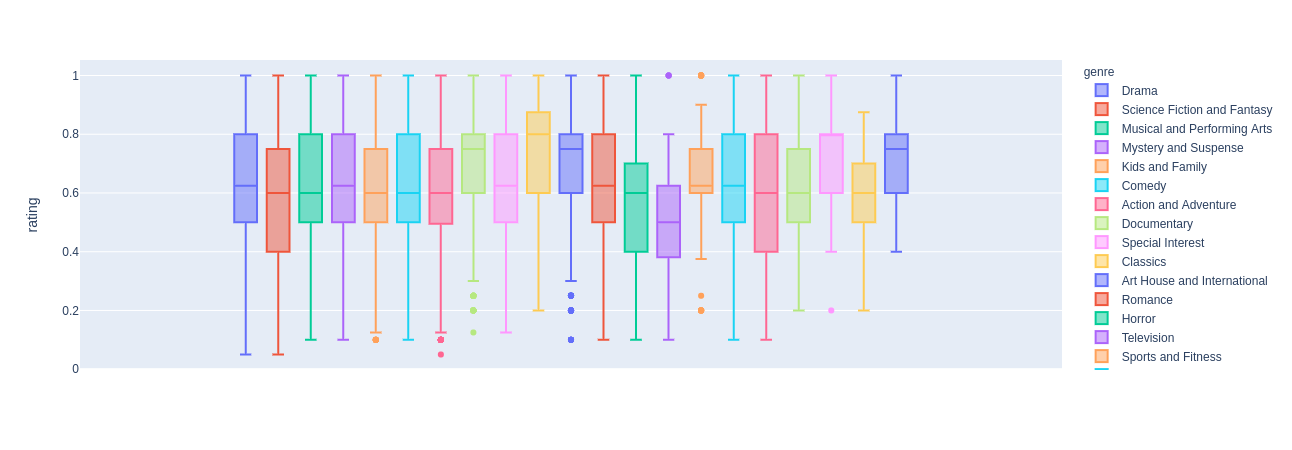

In [119]:
import plotly.express as px
px.box(c_rotten_2_df[['genre','rating']],y='rating',color='genre')

#### Dictionary to map original rating & rating (both available in dataset 2).

In [246]:
o_rating2rating = dict(zip(c_rotten_2_df['original rating'], c_rotten_2_df['rating']))
print(o_rating2rating)

{'3/5': 0.6, nan: nan, 'C': nan, '2/5': 0.4, 'B-': nan, '2/4': 0.5, 'B': nan, '3/4': 0.75, '4/5': 0.8, '4/4': 1.0, '6/10': 0.6, '1/4': 0.25, '8': nan, '2.5/4': 0.625, '4/10': 0.4, '2.0/5': 0.4, '3/10': 0.3, '7/10': 0.7, 'A-': nan, '5/5': 1.0, 'F': nan, '3.5/4': 0.875, 'D+': nan, '1.5/4': 0.375, '3.5/5': 0.7, '8/10': 0.8, 'B+': nan, '9/10': 0.9, '2.5/5': 0.5, '7.5/10': 0.75, '5.5/10': 0.55, 'C-': nan, '1.5/5': 0.3, '1/5': 0.2, '5/10': 0.5, 'C+': nan, '0/5': 0.0, '6': nan, '0.5/4': 0.125, 'D': nan, '3.1/5': 0.62, '3/6': 0.5, '4.5/5': 0.9, '0/4': 0.0, '2/10': 0.2, 'D-': nan, '1/10': 0.1, '3': nan, 'A+': nan, 'A': nan, '4.0/4': 1.0, '9.5/10': 0.95, '2.5': nan, '2.1/2': nan, '6.5/10': 0.65, '3.7/5': 0.74, '8.4/10': 0.8400000000000001, '9': nan, '1': nan, '7.2/10': 0.72, '2.2/5': 0.44000000000000006, '0.5/10': 0.05, '5': nan, '7': nan, '0': nan, '2': nan, '4.5': nan, '7.7': nan, '5.0/5': 1.0, '8.5/10': 0.85, '3.0/5': 0.6, '0.5/5': 0.1, '1.5/10': 0.15, '3.0/4': 0.75, '2.3/10': 0.2299999999999

#### Adding the numeric rating to the original dataframe.

In [144]:
o_rotten_2_df.rename(columns={'rating': 'original rating'},inplace=True)
o_rotten_2_df['rating'] = o_rotten_2_df['original rating'].copy()
o_rotten_2_df.replace({'rating': o_rating2rating},inplace=True)
#pd.to_numeric(o_rotten_2_df[['rating']])

In [245]:
o_rotten_2_df['rating'].unique()

array([0.6, nan, 0.4, 0.5, 0.75, 0.8, 1.0, 0.25, 0.625, 0.3, 0.7, 0.875,
       0.375, 0.9, 0.55, 0.2, 0.0, 0.125, 0.62, 0.1, 0.95, 0.65, 0.74,
       0.8400000000000001, 0.72, 0.44000000000000006, 0.05, 0.85, 0.15,
       0.22999999999999998, 0.45, 0.6666666666666666, 0.86,
       0.42000000000000004, 0.71, 0.35, 0.58, 0.5900000000000001, 0.48,
       0.38, 0.575, 0.8800000000000001, 0.6799999999999999, 0.63, 0.76,
       0.8099999999999999, 0.3333333333333333, 0.77, 0.89, 0.82,
       0.8300000000000001, 0.43333333333333335, 0.41, 0.79,
       0.8699999999999999, 0.43, 0.96, 0.9199999999999999,
       0.16666666666666666, 0.52, 0.6599999999999999, 0.32,
       0.8333333333333334, 0.54, 0.49000000000000005, 0.78,
       0.45999999999999996, '3/2', 0.73, 0.6900000000000001], dtype=object)

In [242]:
o_rotten_2_df

,id,review,original rating,fresh,critic,top_critic,publisher,date,genre,rating
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",Drama|Science Fiction and Fantasy,0.6
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",Drama|Science Fiction and Fantasy,NaN
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",Drama|Science Fiction and Fantasy,NaN
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",Drama|Science Fiction and Fantasy,NaN
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",Drama|Science Fiction and Fantasy,NaN
...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002",Action and Adventure|Art House and Internation...,NaN
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",Action and Adventure|Art House and Internation...,0.2
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",Action and Adventure|Art House and Internation...,0.4
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",Action and Adventure|Art House and Internation...,0.5


In [214]:
px.box(o_rotten_2_df[['critic','rating']].loc[(o_rotten_2_df['top_critic']==1) & (o_rotten_2_df['rating']!=np.nan)],y='rating',color='critic')

KeyError: (nan, '', '', '')

In [234]:
o_rotten_2_df[['critic','rating']].loc[(o_rotten_2_df['top_critic']==1) & (o_rotten_2_df['rating'].ravel()0)]

TypeError: '>' not supported between instances of 'str' and 'int'

In [239]:
o_rotten_2_df['rating'].ravel()[1]==np.nan

False